<a href="https://colab.research.google.com/github/among5094/SWMilitaryAcademy/blob/main/0628(%EC%88%98)_sklearn__begin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## scikit-learn 소개
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

모델은 class로 구성되어 있다. 3가지 주요한 추상 class로 부터 만들어 진다.
1. Estimator 추론기 #젤 높은
 - fit(X, y) 메소드와 getparams(파라미터 값 가져오기), setparams(파라미터 값 설정)
2. Transformer 변환기 #비지도 학습
 - transform 메소드를 갖는다.
 - transform 이전에 fit이 선행되어야 한다.
 - 모든 Transformer는 Estimator이다.
3. Predictor 예측기 #지도학습
 - predict(X) 메소드를 가지고 있다.

## 모델링 과정
1. 분석 기획
 - 목적
 - 기간/조직/비용/수집 데이터에 식별/정의
2. 데이터 수집/저장
 - [train / validation] / test
 - train: 모델을 학습하는 데 사용. w 학습
 - validation: 튜닝 파라미터를 선택
 - test: 모델의 실제 성능을 측정.




머신러닝 프로젝트 프로세스


1. 기획(어떤 문제인지 -> 만약 반려견 찾기 프로그램을 만든다면 모든 개를 대상으로 할지, 반려견으로 많이 쓰이는 품종 데이터만 넣을것인지 등등
      정확도는 얼마나 높이고 어느정도의 기간까지 데이터를 학습시킬 것이고 등등 기획하기  

2. 수집 : 데이터를 수집하는 단계 ->유기견 보호소에 가던가 이미지를 구글에서 찾던가

3. 탐색 : 탐색을 해보고 수정할 게 있으면 수정하기

탐색해봤는데 기획을 수정해야겠다 싶으면 수정하기(1,2,3번을 왔다갔다 함)

4. 추출/ 변경/ 라벨링 : 데이터중에 개를 추출하고 싶은데 늑대나 곰이 있으면 제외하고,사진의 해상도 차이가 크면 해상도 맞춰주기(변경)


5. 학습

6. 성능평가/튜닝 : 원하는 성능이 안 나오면 계속 튜닝하면서 고치기

7. 운영



      

## DecisionTreeClassifier

In [ ]:
import sklearn

### 유방암 데이터

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data.target, random_state=42, )

model = DecisionTreeClassifier(criterion='entropy') #criterion ->
model

DecisionTreeClassifier(criterion='entropy')

entropy(무질서도=자연스러운 것)는 하나의 변수에 대해 값이 얼마나 섞여 있는 가를 측정하는 지표
- target의 유방암. 1(양성), 0(악성)의 값이 얼마나 섞여있는 가를 기준으로 데이터 집단을 분리한다.
+)양성은 제거하지 않아도 되는 종양

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
# (n, p) : n은 데이터의 갯수, p: 변수의 갯수
data.data.shape

(569, 30)

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.feature_names
#가장 나쁜 값

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target[:5]

array([0, 0, 0, 0, 0])

In [ ]:
import numpy as np
np.unique(data.target, return_counts=True, ) #unique함수 : 고유한 원소들을 모은 뒤, 1차원 shape으로 변환하고 정렬을 진행한 결과를 반환

(array([0, 1]), array([212, 357]))

In [ ]:
mradius = data.data[:, 0] #모든행의0번째 열을 mradius라고 함
print(mradius.mean(), mradius.std()) #평균과 표준편차를 구해

mmscaled = (mradius - mradius.min()) / (mradius.max() - mradius.min())
print(mmscaled.max(), mmscaled.min())
print(mmscaled.mean(), mmscaled.std())

stdscaled = (mradius - mradius.mean()) / mradius.std() #stdscaled : 평균을 빼고 표준편차로 나눠줌
print(stdscaled.max(), stdscaled.min())
print(stdscaled.mean(), stdscaled.std())


14.127291739894552 3.520950760711062
1.0 0.0
0.3382219574941811 0.16664067209574815
3.9712876465451097 -2.0296483039857525
-1.3736327053358703e-16 1.0


In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

$y \in \{0, 1\}$

$p(y=1) + p(y=0) = 1$

- Entropy에 의한 : $Loss(p(y=1)) = - y \log p(y=1) - (1-y)log (1 - p(y=1))$
- Giny에 의한: $Loss(p(y=1)) = 1 - y P(y=1)^2 - (1-y)(1 - P(y=1))^2$ <- 지니는 살짝 완만함. 엔트로피보다

입력데이터 X는 data.data에 존재합니다. N=569, D=30

In [ ]:
data.data.shape

(569, 30)

데이터의 평균값의 분포가 다양하므로, 스케일링이 필요하다. 다만, tree 기반의 모델은 scaling을 필요로 하지 않는다.

In [ ]:
data.data.mean(axis=0)

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [ ]:
data.data.std(axis=0)

array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
       1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
       2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
       2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
       3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
       4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
       2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
       6.18130785e-02, 1.80453893e-02])

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [ ]:
143*4

572

In [ ]:
data.data[0] #첫 번째 종양에 대한 데이터

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [ ]:
data.target[0] #데이터에 대한 판정은 0이니까 "악성"

0

[Quiz] target에서 1과 0의 빈도를 계산해보자.

In [ ]:
import numpy as np
uniq, freq = np.unique(data.target, return_counts=True)
uniq, freq

(array([0, 1]), array([212, 357]))

In [ ]:
import pandas as pd
pd.Series(data.target).value_counts()

1    357
0    212
dtype: int64

모델을 학습데이터로 학습하고, 테스트 데이터로 예측을 수행하여 예측값 y_pred을 생성합니다.

In [ ]:
model.fit(X_train, y_train) #fit에는 x,y같이 넣어줌
y_pred = model.predict(X_test) #예측할 때는 X만 넣어줌. 모르니까 예측하는거니까
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

이를 테스트데이터의 참값과 비교해 봅니다.

In [ ]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

테스트 데이터에서의 정확도는 아래와 같이 수행될 수 있습니다.

In [ ]:
(y_pred == y_test).mean()

0.951048951048951

위 과정을 score 메소드를 이용하여 한번에 수행할 수 있습니다. train과 test의 차이가 많이 나서 실제 정확도(test에서의)는 만족스럽지 못하다.

In [ ]:
model.score(X_test, y_test) #정확도 계산

0.951048951048951

In [ ]:
model.score(X_train, y_train)

1.0

### 모델 시각화
모델의 학습내용은 tree에 저정되어 있습니다. graphviz는 아래와 같이 간단히 설치한다.
```bash
pip install graphviz
```

In [ ]:
# !pip install graphviz

In [ ]:
sp1 = (X_train[:, data.feature_names == 'mean concave points'] <= 0.051).reshape((-1))
sp1.shape

(426,)

In [ ]:
not True

False

In [ ]:
left = y_train[sp1]
right = y_train[~ sp1]

In [ ]:
print(np.unique(left, return_counts=True))
print(np.unique(right, return_counts=True))

(array([0, 1]), array([ 16, 251]))
(array([0, 1]), array([142,  17]))


In [ ]:
# sklearn에서 끝이 _ 인 속성은 쓰기 불가용도
tree = model.tree_ #_로 끝나는 건 쓰지말고 읽기만 하라는 뜻

In [ ]:
import graphviz
from sklearn.tree import export_graphviz, plot_tree

아래와 같이 plot_tree 함수로 split point와 tree를 그려볼 수 있습니다.

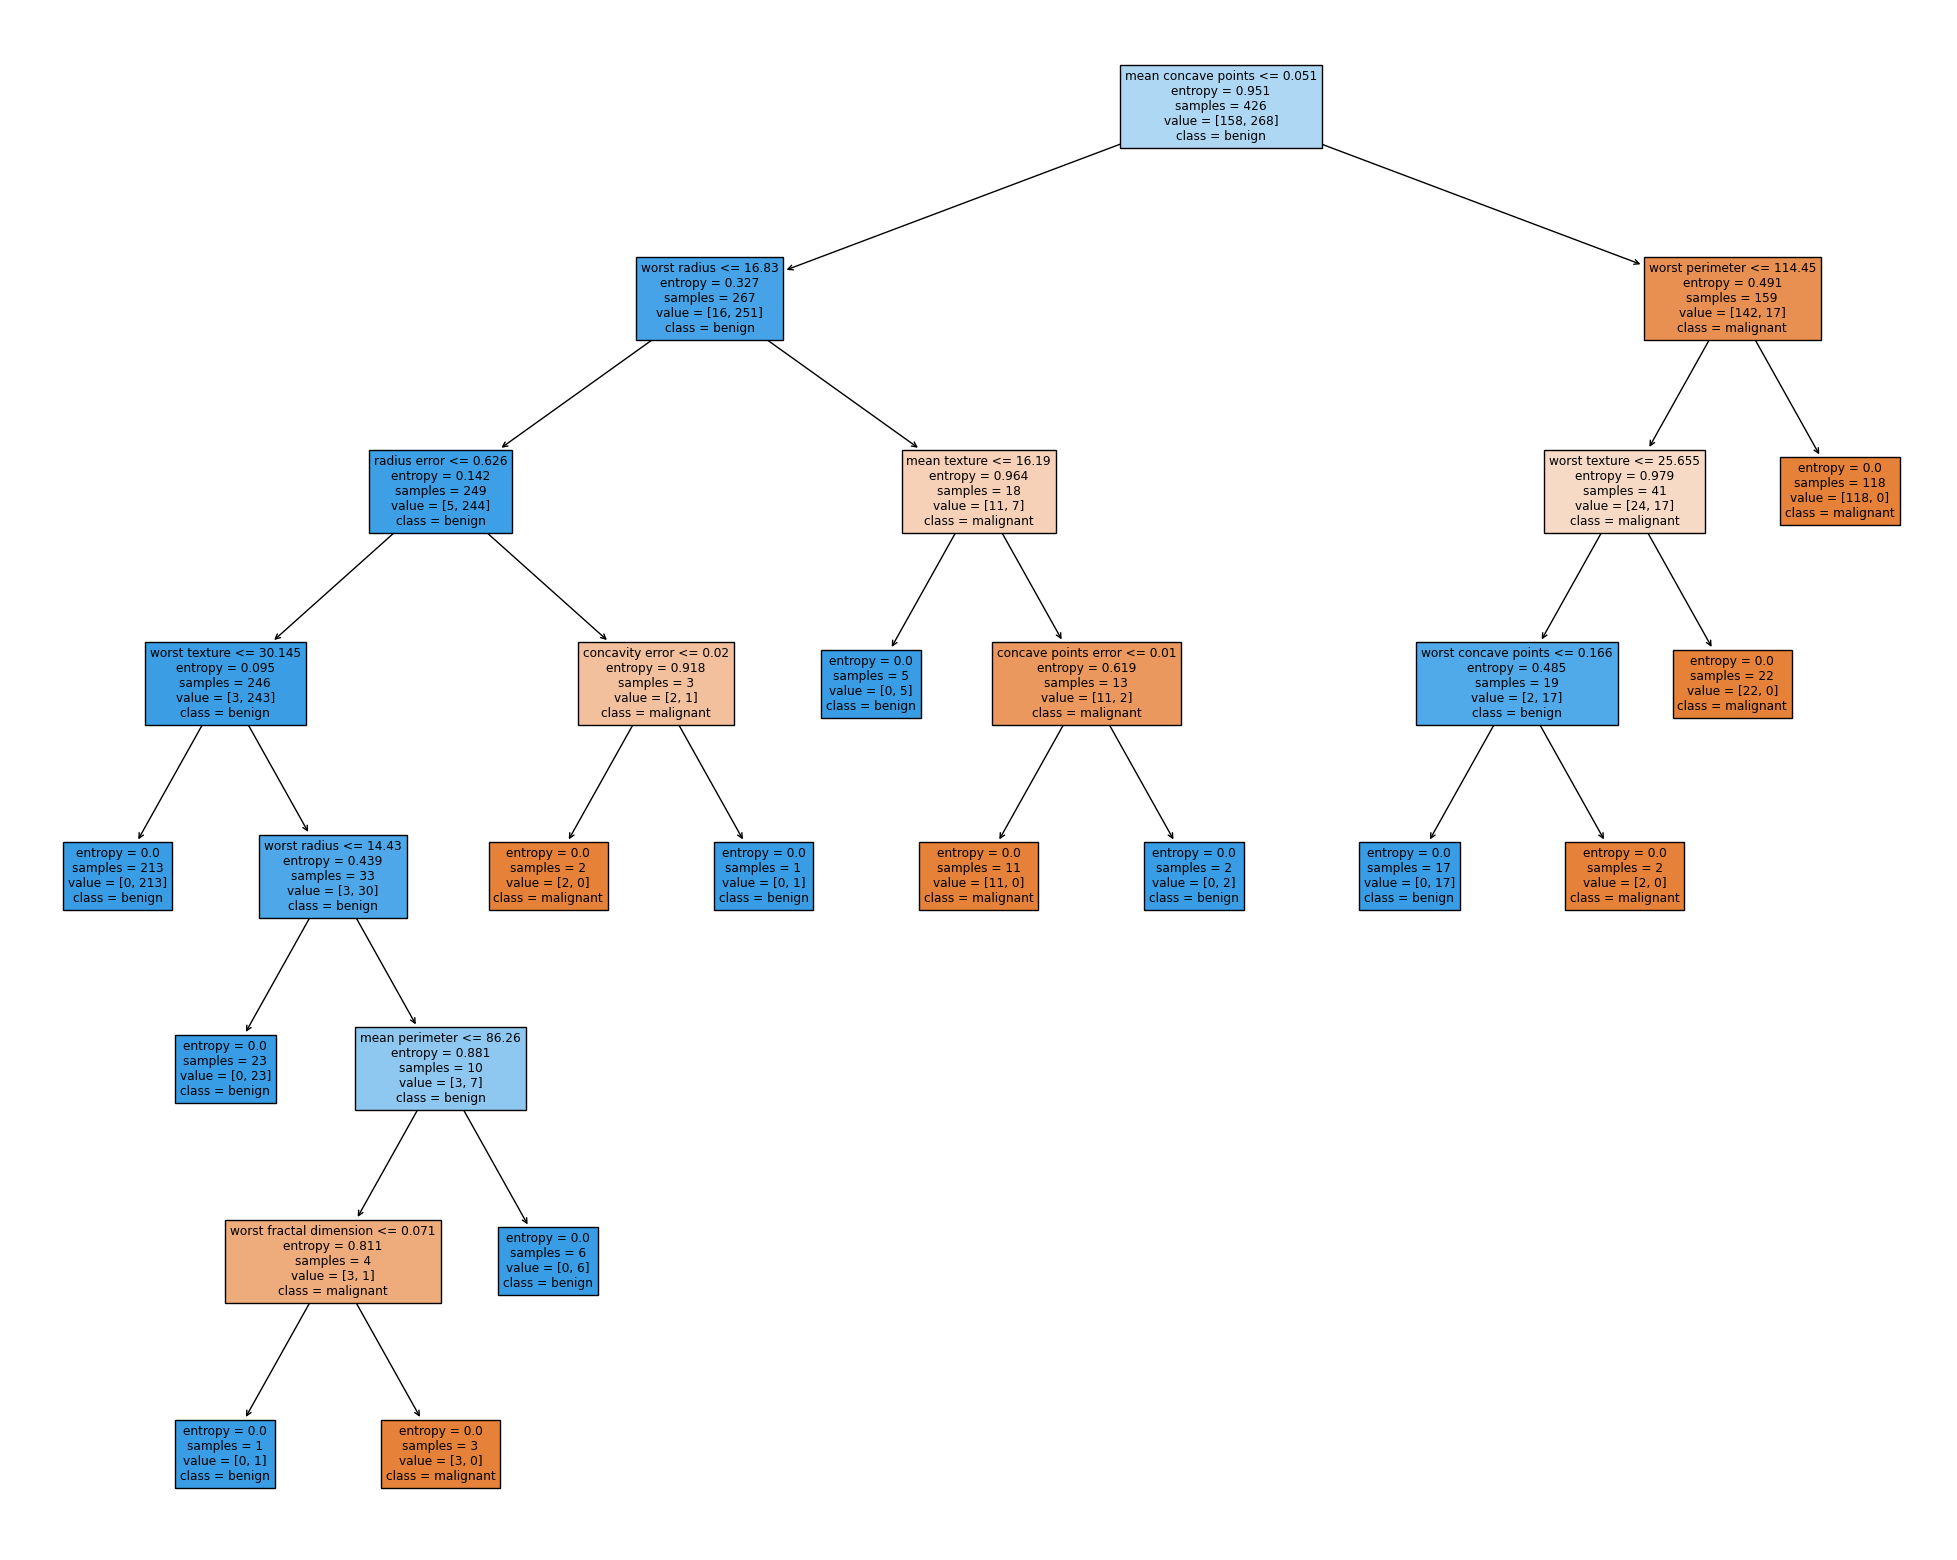

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model,
              feature_names=data.feature_names,
              class_names=data.target_names,
              filled=True)

아래 작업을 수행하기 위한 준비사항:
1. pip install graphviz
2. [graphviz 사이트](https://graphviz.org/download/)에서 설치파일을 다운로드하고 설치한다.
3. 환경변수에 graphviz 설치폴더의 bin 폴더를 path를 등록.(설치옵션)
4. 컴퓨터를 재부팅시킨다.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/MLStart')
!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


FileNotFoundError: ignored

In [ ]:
dot_data = export_graphviz(model, out_file=None,
                     feature_names=data.feature_names,
                     class_names=data.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
export_graphviz(model, out_file='tree.dot',
                feature_names=data.feature_names,
                class_names=data.target_names,
                filled=True, rounded=True,
                special_characters=True)

with open("tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph); dot.format='png'
dot.render(filename='tree')

In [ ]:
from sklearn.tree import export_text
treetext = export_text(model, decimals=4,
                       feature_names=list(data.feature_names))
print(treetext)

### 엔트로피의 이해
x 라는 확률변수의 정보량 : $-log {p(x_i)}$

특징: 숫자 2가 밑수인 log. 2는 비트수를 의미. 컴퓨터는 2진수로 이루어져있으니까  
확률이 1인 것 -> 매번 동일하게 관찰되는 건 정보량이 없는것이다.  
정보량이 0이 되면 0에 가까워짐. 그건 희귀한 사실이니까 정보량이 늘어나는 것이다.


- p(앞면) = 0.5
- p(뒷면) = 0.4
- p(모서리) = 0.1




In [ ]:
ps = np.array([.5, .4, .1])
getInfo = lambda ps: - np.log2(ps)
infos = getInfo(ps)
infos

정보량의 기대값은 어떻게 될까? 이 정보를 관찰할 확률
$$\begin{align}
E[f(x)] &= \sum_i f(x_i) p(x_i) \\
&= - \sum_i \log {p(x_i)} p(x_i) \\
\end{align}$$

**엔트로피는 정보량에 대한 기대값**이다.


하나의 집단에 모든 정보량이 1이면 엔트로피는 0이다(=정보량이 없다는 뜻)



In [ ]:
infos.dot(ps)

In [ ]:
einfo = 0
for i in range(len(ps)):
    einfo += infos[i]*ps[i]
einfo

이 동전에 대해
- 앞면이 나오면 꽝, 뒷면이 10원, 모서리가 나오면 1000원이라고 할 때,
- 동전을 1번 던져서 얻을 수 있는 기대 수익은 얼마나 될까?

In [ ]:
gains = [0, 10, 1000]

In [ ]:
# .5 * 0 + .4*10 + .1*1000
ps.dot(gains)

#균등한 확률일 때 엔트로피가 가장 높다. .5씩 .5씩 섞여있을 때 엔트로피가 가장 높을 때
#순수할 때(=분류가 많이 됐을 때) 엔트로피가 가장 낮아진다.

[Quiz] 2개의 범주(0, 1)가 있는데, 1이 될 확률이 0.01 ~ 0.99 까지 변할 때, 이때의  entropy 곡선을 그려보자.
$$Entroy(p) = -\sum_{y=0}^1 p(y) * \log{p(y)}$$

In [ ]:
proby1 = np.arange(0.01, 1, 0.01)
proby0 = 1 - proby1
proby0[:5]

In [ ]:
def entropy(p0, p1):
    rst = 0
    rst += -p1*np.log(p1)
    rst += -p0*np.log(p0)
    return rst

In [ ]:
import matplotlib.pyplot as plt
plt.plot(proby1, entropy(proby0, proby1))

#그래프 보면서
#균등한 확률일 때 엔트로피가 가장 높다. .5씩 .5씩 섞여있을 때 엔트로피가 가장 높을 때
#순수할 때(=분류가 많이 됐을 때) 엔트로피가 가장 낮아진다.

2개의 주사위가 있다:
1. 1번 주사위는 1 ~ 6까지 나올 확률이 [.1, .2. .3, .2, .1, .1]
2. 2번 주사위는 1 ~ 6까지 나올 확률이 [1/6, 1/6. 1/6, 1/6, 1/6, 1/6]

이때 몇번 주사위가 엔트로피가 높을까? 계산하여 그 결과를 출력하자.

In [ ]:
def EntropyValue(probList):
    # return -(probList*np.log(probList)).sum()
    return - probList.dot(np.log(probList))

In [ ]:
print(EntropyValue(np.array([.1, .2, .3, .2, .1, .1])))
print(EntropyValue(np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])))

### split point의 이해
왜 DTC 모델은 첫 split point로 mean concave points <= 0.0513 을 선택했는 지 이해해보자.

엔트로피와 정보이득:
$$\begin{align}
E(y) &= - \sum_{i=0}^{C} P(y=i) \log P(y=i) \\
I_G(s) &= E(root) - \left( \cfrac {n_l} n E(left) + \cfrac {n_r} n E(right)  \right)
\end{align}$$
- $y \in \{0, \cdots, C\}$
- split point는 $I_G$을 최대화하는 방향으로 결정한다.

In [ ]:
def entropy(y):
    freqs = pd.Series(y).value_counts()
    probs = freqs / freqs.sum()
    return - probs.dot(np.log(probs))

In [ ]:
def infogain(y, X, i, j):
    parEntropy = entropy(y)
    sp = X[i, j]
    bv = X[:, j] <= sp
    left = y[bv]
    right = y[~bv]
    N = len(y)
    nleft = bv.sum()
    nright = N  - nleft
    leftEnropy = nleft / N * entropy(left)
    rightEnropy = nright / N * entropy(right)
    return parEntropy - (leftEnropy + rightEnropy)

In [ ]:
MAX, maxi, maxj = 0, None, None
for j in range(X_train.shape[1]):
    for i in range(X_train.shape[0]):
        ig = infogain(y_train, X_train, i, j)
        if ig > MAX:
            MAX = ig
            maxi, maxj = i, j

print(MAX) # 0.3903935490045703
print(f"{data.feature_names[maxj]} = {X_train[maxi, maxj]} 이 split point이다.")

0.05074는 0.0513 보다 작은 최대값이다.
- 다른 구현 패키지는 데이터 포인트에서 절단점을 찾는데
- sklearn은 데이터 포인트를 정렬하고, 데이터 포인트의 중간점에서 절단점을 찾는다.
 - 장점: 절단점을 찾는 횟수가 한번 더 줄어든다.
 - 단점: 정렬해야 하는 시간이 추가로 더 생긴다.

실제 중간점을 찾아보면 아래와 같다.

In [ ]:
near2psidx = np.abs(X_train[:, maxj] - 0.0513).argsort()[:2]
near2psidx

In [ ]:
near2ps = X_train[near2psidx, maxj]
near2ps

In [ ]:
near2ps.mean()

In [ ]:
infogain(y_train, X_train, 127, 7)

[Quiz] 위 모델에 대해 DecisionTreeClassifier의 옵션을 조정하여 test 데이터에 대한 정확도를 향상시켜보자.

In [ ]:
m = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)
m.fit(X_train, y_train)
score = m.score(X_test, y_test)
score

In [ ]:
m.score(X_train, y_train)

In [ ]:
best= {}
best['score'] = 0
mds = [3,4,5,6]
msls = range(2, 11)
mlns = range(7, 12)
for md in mds:
    for msl in msls:
        for mln in mlns:
            m = DecisionTreeClassifier(criterion='entropy', max_depth=md,
                                       min_samples_leaf=msl, max_leaf_nodes=mln)
            m.fit(X_train, y_train)
            score = m.score(X_test, y_test)
            if score > best['score']:
                print(f"current best score is {score} at md={md}, msl={msl}, mln={mln}")
                best['score'], best['md'], best['msl'], best['mln'], best['model'] = score, md, msl, mln, m
print(best)

In [ ]:
data.data.mean(axis=0)

### Scaler 사용해보기
fit_transform 메소드는 학습과 변환을 한번에 수행한다. 아래 코드는 같은 결과를 생성한다.
```python
X_tr_scaled = scaler.fit_transform(X_train) #fit(학습)도 하고 transform(변환)도 하는
X_tr_scaled = scaler.fit(X_train).transform(X_train)
```

StandardScaler는 평균을 0, 표준편차를 1로 정규분포화하는 스케일러이다.

In [ ]:
from sklearn.preprocessing import StandardScaler

print(X_train[:1])

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
print(X_tr_scaled[:1])
X_tst_scaled = scaler.transform(X_test)

In [ ]:
means, stds = X_train.mean(axis=0), X_train.std(axis=0)
((X_train - means)/stds)[:1]

In [ ]:
X_tr_scaled.mean(0)

In [ ]:
X_tr_scaled.std(0)

In [ ]:
m2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
m2.fit(X_tr_scaled, y_train)
m2.score(X_tst_scaled, y_test)

In [ ]:
export_graphviz(m2, out_file='tree2.dot',
                feature_names=data.feature_names,
                class_names=data.target_names,
                filled=True, rounded=True,
                special_characters=True)

with open("tree2.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph); dot.format='png'
dot.render(filename='tree2')

In [ ]:
model.score(X_train, y_train)

스케일된 데이터로 학습한 모델로 스케일링이 않된 데이터로 평가하면 엉뚱한 결론에 도달한다.

In [ ]:
m2.score(X_train, y_train)

In [ ]:
m2.get_params()

엔트로피와 정보이득에 대한 이해:
$$\begin{align}
E(y) &= - \sum_{i=0}^{C} P(y=i) \log P(y=i) \\
I_G(s) &= E(root) - \left( \cfrac {n_l} n E(left) + \cfrac {n_r} n E(right)  \right)
\end{align}$$
- $y \in \{0, \cdots, C\}$
- split point는 $I_G$을 최대화하는 방향으로 결정한다.

In [ ]:
root = np.array([212, 356])
# splitter 1에 의한 branch
left1 = np.array([2, 0])
right1 = np.array([210, 356])

# splitter 2에 의한 branch - 어느 것이 좋을까?
left2 = np.array([200, 56])
right2 = np.array([12, 300])

In [ ]:
MIN = 10**(-8)
def entropy(arr):
    Ps = arr / arr.sum()
    return - Ps.dot(np.log(Ps + MIN))
def Igain(root, left, right):
    n, nl, nr = root.sum(), left.sum(), right.sum()
    return entropy(root) - (nl/n * entropy(left) + nr/n * entropy(right) )

In [ ]:
Igain1 = Igain(root, left1, right1)
Igain2 = Igain(root, left2, right2)
Igain1, Igain2

In [ ]:
entropy(root), entropy(left1), entropy(right1), entropy(left2), entropy(right2)

[Quiz] P(y=1) = p, P(y=0) = q = 1 - p 이다:
- p 값이 0.01 ~ 0.99 까지 변할 때
- Entropy를 계산하여 p, Entropy를 시각화해보자.

In [ ]:
p = np.arange(0.01, 1., 0.01)
p

In [ ]:
q = 1 - p
pq = np.hstack([p.reshape((-1,1)), q.reshape((-1,1))])
ents = pd.DataFrame(pq).agg(entropy, axis=1)

import matplotlib.pyplot as plt
_ = plt.plot(p, ents.values)
plt.xlabel("p = Prob(y=1)")
_ = plt.ylabel("Entropy(p)")
_ = plt.vlines(.5, 0., .7, 'k', '--')

위 그래프를 보면, Prob(y=1) = p = 0.5 일때 최대값을 갖는다.
- p = 0.5: y = 1의 수와 y = 0인 수가 같다는 것이다.
- 즉, 최대 무질서 상태

[Quiz] tree.png 파일에 있는 3개의 splitter에 대해
```
mean concave points <= 0.0513
worst radius <= 16.8300
worst perimeter <= 114.4500
```
1. root 노드에 적용해보고,
2. 정보이득이 큰 순으로 splitter를 결정해보자.
3. split의 순서는 어떻게 될까?

In [ ]:
np.where(data.feature_names == "mean concave points")

In [ ]:
mcpIdx = np.where(data.feature_names == "mean concave points")[0][0]
wrIdx = np.where(data.feature_names == "worst radius")[0][0]
wpIdx = np.where(data.feature_names == "worst perimeter")[0][0]

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
root = np.unique(y_train, return_counts=True)[1]
mcpLeft = np.unique(y_train[X_train[:,mcpIdx] <= 0.0513], return_counts=True)[1]
mcpRight = np.unique(y_train[X_train[:,mcpIdx] > 0.0513], return_counts=True)[1]
wrLeft = np.unique(y_train[X_train[:,wrIdx] <= 16.8300], return_counts=True)[1]
wrRight = np.unique(y_train[X_train[:,wrIdx] > 16.8300], return_counts=True)[1]
wpLeft = np.unique(y_train[X_train[:,wpIdx] <= 114.4500], return_counts=True)[1]
wpRight = np.unique(y_train[X_train[:,wpIdx] > 114.4500], return_counts=True)[1]
root, mcpLeft, mcpRight, wrLeft, wrRight, wpLeft, wpRight,

In [ ]:
Igain_mcp = Igain(root, mcpLeft, mcpRight)
Igain_wr = Igain(root, wrLeft, wrRight)
Igain_wp = Igain(root, wpLeft, wpRight)
Igain_mcp, Igain_wr, Igain_wp

In [ ]:
data.feature_names[model.feature_importances_.argsort()[::-1]]

worst radius로 왼쪽을 쪼겠을 때의 정보이득량을 계산해보자.

In [ ]:
lbv, rbv = X_train[:,mcpIdx] <= 0.0513, X_train[:,mcpIdx] > 0.0513
llbv = (X_train[:,wrIdx] <= 16.8300) & (X_train[:,mcpIdx] <= 0.0513)
lrbv = (X_train[:,wrIdx] > 16.8300) & (X_train[:,mcpIdx] <= 0.0513)
rlbv = (X_train[:,wpIdx] <= 114.4500) & (X_train[:,mcpIdx] > 0.0513)
rrbv = (X_train[:,wpIdx] > 114.4500) & (X_train[:,mcpIdx] > 0.0513)

ytr = pd.Series(y_train)
tmp = pd.Series([0, 0])
tmp.add(ytr[rrbv].value_counts(), fill_value=0)

mcpLeft = tmp.add(ytr[lbv].value_counts(), fill_value=0).values
mcpRight = tmp.add(ytr[rbv].value_counts(), fill_value=0).values
wrll = tmp.add(ytr[llbv].value_counts(), fill_value=0).values
wrlr = tmp.add(ytr[lrbv].value_counts(), fill_value=0).values
wprl = tmp.add(ytr[rlbv].value_counts(), fill_value=0).values
wprr = tmp.add(ytr[rrbv].value_counts(), fill_value=0).values

mcpLeft, mcpRight, wrll, wrlr, wprl, wprr

In [ ]:
n, nl, nr = root.sum(), mcpLeft.sum(), mcpRight.sum()
Igain_wr = nl / n * Igain(mcpLeft, wrll, wrlr)
Igain_wp = nr / n * Igain(mcpRight, wprl, wprr)

Igain_wr, Igain_wp

따라서, wrong perimeters를 이용하여 우측 branch를 먼저 쪼갰다.

[Quiz] GridSearchCV를 이용하여, 위 max_depth, max_leaf_nodes, min_samples_leaf 구간에 대해 튜닝하여 best model을 선정하자.

In [ ]:
len(mds), len(mlns), len(msls)

In [ ]:
trcnt = np.unique(y_train, return_counts=True)[1]
trcnt / trcnt.sum()

In [ ]:
tecnt = np.unique(y_test, return_counts=True)[1]
tecnt / tecnt.sum()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
params = {'max_depth':mds, 'max_leaf_nodes':mlns, 'min_samples_leaf':msls}
fold = StratifiedKFold()
grid = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=-1, cv=fold, )
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

GridSearchCV가 수행하는 내용:

In [ ]:
alls = []
i = 0
for tridx, teidx in fold.split(X_train, y_train):
    scores = {}
    for v1 in params['max_depth']:
        for v2 in params['max_leaf_nodes']:
            for v3 in params['min_samples_leaf']:
                Xtr, ytr, Xte, yte = X_train[tridx], y_train[tridx], X_train[teidx], y_train[teidx]
                param = {'max_depth':v1, 'max_leaf_nodes':v2, 'min_samples_leaf':v3}
                m = DecisionTreeClassifier(criterion='entropy', **param)
                m.fit(Xtr, ytr)
                scores[tuple((k, v) for k, v in param.items())] = m.score(Xte, yte)

    alls.append(scores)

In [ ]:
import pandas as pd
alls = pd.DataFrame(alls)
alls.head()

In [ ]:
best_params = dict(alls.columns[alls.mean().argmax()])
best_model = DecisionTreeClassifier(criterion='entropy', **best_params)
best_model.fit(X_train, y_train)

In [ ]:
best_model.score(X_test, y_test)

grid가 best_estimator와 같이 동작한다.

In [ ]:
grid.score(X_test, y_test)

In [ ]:
grid.best_estimator_.score(X_test, y_test)

[Quiz] iris 데이터를 이용하여 DecisionTree로 분류 모델을 생성하고, 튜닝해보자.

In [ ]:
iris = sklearn.datasets.load_iris()

In [ ]:
iris.keys()

In [ ]:
np.unique(iris.target, return_counts=True)

In [ ]:
iris.feature_names

In [ ]:
iris.target_names

In [ ]:
print(iris.DESCR)

In [ ]:
X, y = iris.data, iris.target

In [ ]:
X.mean(axis=0)

모델 생성 절차:
1. 데이터 전처리
2. 데이터를 학습용과 테스트용으로 분리
3. 학습데이터로 학습
4. 테스트 데이터로 평가
5. 모델 튜닝

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# base model : 이후 나오는모델은 이것보다 성능이 좋아야되.
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
bs = clf.score(X_test, y_test)
bs

머신러닝:
1. 지도학습(X, y)
 - 회귀: 값을 예측 문제
 - 분류: 범주를 예측 문제
2. 비지도학습(X)

sklearn:
1. Estimator: fit으로 학습
2. Transformer: transform으로 변환
3. Predictor: predict로 예측을 수행

- DecisionTreeClassifier: Estimator(fit전) , Predictor(fit후)
- StandardScaler: Estimator(fit전) , Transformer(fit후)

틀렸을 때의 비용이 서로 다르다.

class_weight에 대해

악성0, 양성1 일 때,
양성이었는데 음성으로 진단한 건 그냥 틀린건데
음성이었는데 양성으로 오진한거면 큰일난다. 틀린건 같지만 틀린 비용이 크다.
살 수 있는 기회를 놓치는 것이기 때문.   

